# بسم الله الرحمن الرحيم

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

In [35]:
df=pd.read_csv("data.csv")
df.head()

,x,y,color
0,516.012706,393.014514,0
1,436.211762,408.656585,0
2,512.052601,372.022014,0
3,489.140464,401.807159,0
4,446.207986,338.516682,0


In [36]:
df.describe()

,x,y,color
count,336.000000,336.000000,336.000000
mean,577.105010,349.011462,0.952381
std,78.967344,68.225253,0.816322
min,416.820261,201.328804,0.000000
25%,502.775744,288.342589,0.000000
50%,605.392287,368.069573,1.000000
75%,639.534882,400.954368,2.000000
max,698.541083,472.039304,2.000000


In [37]:
df['color'].value_counts()

0    120
1    112
2    104
Name: color, dtype: int64

In [38]:
clust4=np.random.randint([400,200],[525,275],size=(107,2))
temp=pd.DataFrame(clust4,columns=['x','y'])

In [39]:
df=pd.concat([df.drop('color',axis=1),temp],axis=0)

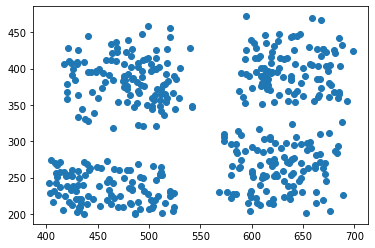

In [40]:
plt.scatter(df['x'],df['y'])

## Elbow Curve

We Are Using 1 clusters
The Sum of Square Distance between points and its centroid is 6011174.750550606


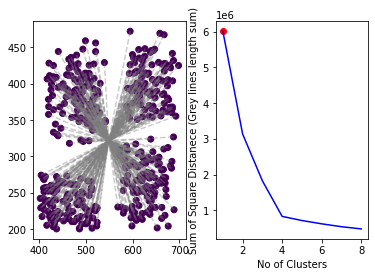

We Are Using 2 clusters
The Sum of Square Distance between points and its centroid is 3134762.957034652


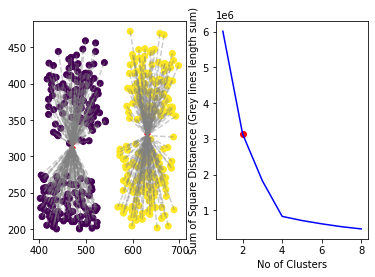

We Are Using 3 clusters
The Sum of Square Distance between points and its centroid is 1825996.7941868939


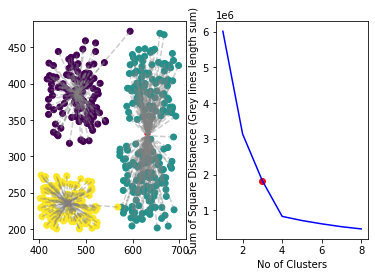

We Are Using 4 clusters
The Sum of Square Distance between points and its centroid is 830923.0544421813


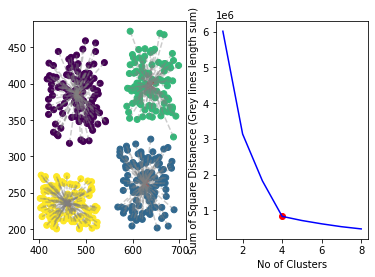

We Are Using 5 clusters
The Sum of Square Distance between points and its centroid is 715210.1944651358


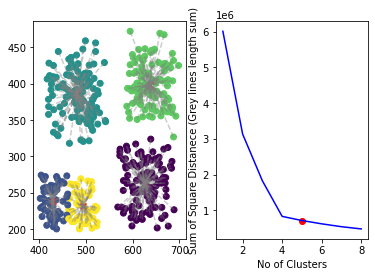

We Are Using 6 clusters
The Sum of Square Distance between points and its centroid is 622450.4147225528


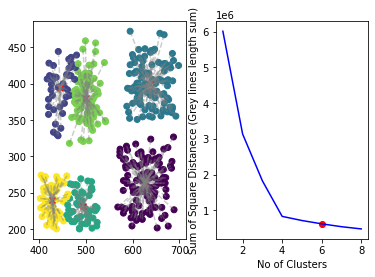

We Are Using 7 clusters
The Sum of Square Distance between points and its centroid is 542346.3627357837


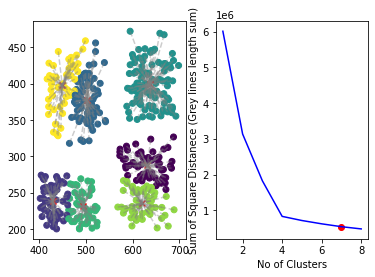

We Are Using 8 clusters
The Sum of Square Distance between points and its centroid is 480155.174770119


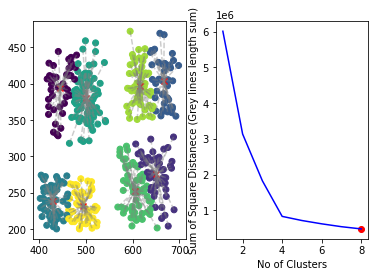

In [50]:
from sklearn.cluster import KMeans
sshist=list()

for i in range(1,9):
    model=KMeans(n_clusters=i,random_state=2002)
    model.fit(df[['x','y']])
    sshist.append(model.inertia_)
for i in range(1,9):
    print("We Are Using {} clusters".format(i))
    model=KMeans(n_clusters=i,random_state=2002)
    model.fit(df[['x','y']])
    clusters=model.predict(df[['x','y']])
    cents=model.cluster_centers_
    print("The Sum of Square Distance between points and its centroid is {}".format(model.inertia_))
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.scatter(df['x'],df['y'],c=clusters)
    for ClustNum in range(cents.shape[0]):
        currclust=df[['x','y']][clusters==ClustNum]
        for row in currclust.itertuples():
            plt.plot([row[1],cents[ClustNum,0]],[row[2],cents[ClustNum,1]],linestyle='dashed',color="grey",alpha=0.4)
    plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker="x",color='red')
    
    plt.subplot(1,2,2)
    plt.xlabel("No of Clusters")
    plt.ylabel("Sum of Square Distanece (Grey lines length sum)")
    plt.scatter(i,model.inertia_,c='red')
    plt.plot(range(1,9),sshist,c='blue')
    plt.show()
            

    